In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Start with trace

In [2]:
import pandas as pd
import numpy as np
import datetime

In [9]:
df = pd.read_csv('2778884_noise.csv')

In [11]:
home_coords = [0.5*(df.lat.max()+df.lat.min()), 0.5*(df.lon.max()+df.lon.min())] 

In [6]:
import folium

colors = ['green','darkgreen','lightgreen','darkblue','lightblue',
          'red','blue','gray','darkred','orange','beige',
          'purple','pink','cadetblue','lightgray','black'] 
# 'lightred','darkpurple'

In [87]:
m = folium.Map(location=home_coords, width='60%', height='55%', top='0%',
                   zoom_start=12, tiles='CartoDBpositron', control_scale=True)

len_colors=len(colors)

lons = df.lon.values
lats = df.lat.values
coords = list(zip(lats,lons))


offset=40
range_ =51

for n in range(range_):
    nn = n*offset
    nnn = (n+1)*offset+1
    coco = coords[nn:nnn]
    folium.PolyLine(coco, color=colors[n%len_colors]).add_to(m)    
m    

In [88]:
m.save("../../docs/illustration/map.html")

In [59]:
!pip install selenium --user

  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [71]:
from selenium import webdriver

# Option 1 - with ChromeOptions
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox') # required when running as root user. otherwise you would get no sandbox errors. 
driver = webdriver.Chrome(options=chrome_options)
'''    driver_path='/home/dev/chromedriver', chrome_options=chrome_options,
  service_args=['--verbose', '--log-path=/tmp/chromedriver.log'])'''

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [61]:
driver.set_window_size(4000, 3000)  # choose a resolution
driver.get('map.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('screenshot.png')

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [52]:
!cp map.png ../../docs/illustration/

## Apply projections and plot in 2D1T

In [7]:
import pyproj as proj

# setup your projections
crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
crs_bng = proj.Proj(init='epsg:27700') # use a locally appropriate projected CRS

In [14]:
plons, plats = proj.transform(crs_wgs, crs_bng, lons, lats)

In [18]:
df['time'] = pd.to_datetime(df['time'])

In [29]:
times = df.time.values

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import matplotlib.dates as mdates

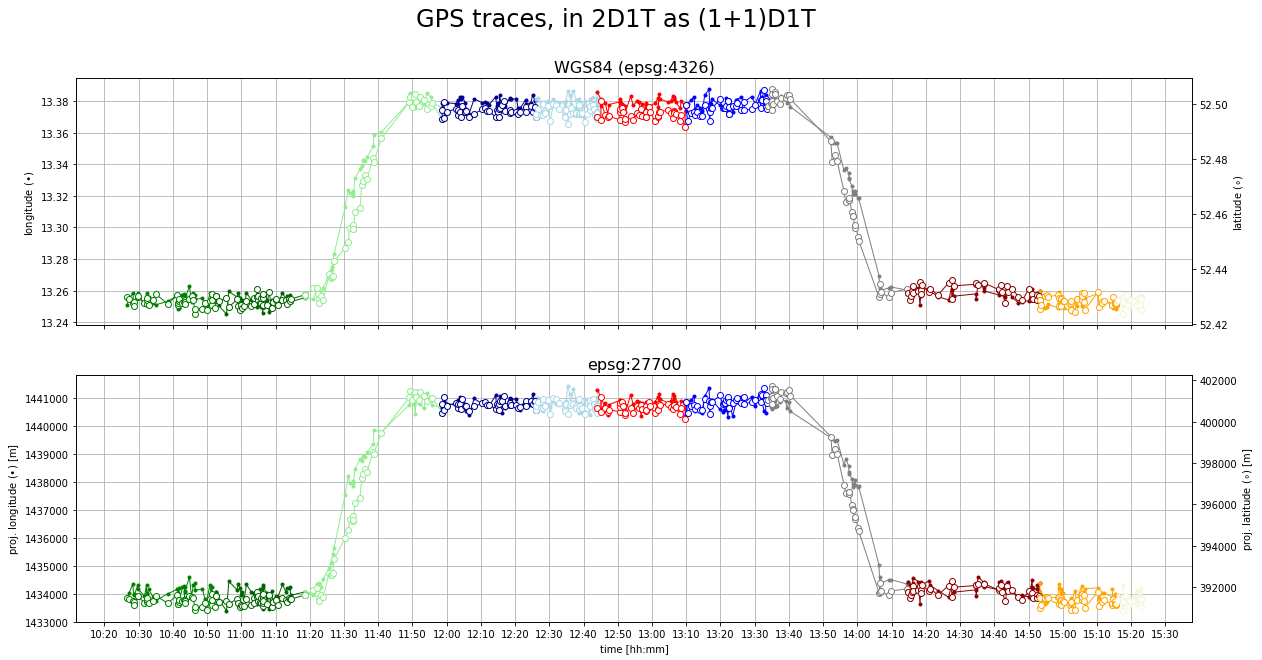

In [30]:
locator = mdates.AutoDateLocator(minticks=24, maxticks=36)


fig, axs= plt.subplots(2,1, figsize=[20,10])


axs = axs.flatten()

ax = axs[0]

axt = ax.twinx()

offset=40
range_ =51
for n in range(range_):
    nn = n*offset
    nnn = (n+1)*offset+1
    coco = coords[nn:nnn]

    ax.plot(times[nn:nnn], lons[nn:nnn], '.-', color=colors[n%len_colors], lw=1)
    axt.plot(times[nn:nnn], lats[nn:nnn], 'o-', markerfacecolor='w',markeredgewidth=1, color=colors[n%len_colors], lw=1)    

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator)    
ax.set_xticklabels([],visible=False)

axt.set_ylabel(r"latitude ($\circ$)")
ax.set_ylabel(r"longitude ($\bullet$)")
#ax.set_xlabel("time")
ax.set_title("WGS84 (epsg:4326)", fontsize=16)
ax.grid()

ax = axs[1]
axt = ax.twinx()

for n in range(range_):
    nn = n*offset
    nnn = (n+1)*offset+1
    coco = coords[nn:nnn]
    color=colors[n%len_colors]
    ax.plot(times[nn:nnn], plons[nn:nnn], '.-', color=color, lw=1)
    axt.plot(times[nn:nnn], plats[nn:nnn], 'o-', markerfacecolor='w',markeredgewidth=1, color=color, lw=1)    

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator)    

axt.set_ylabel(r"proj. latitude ($\circ$) [m]")
ax.set_ylabel(r"proj. longitude ($\bullet$) [m]")
ax.set_xlabel("time [hh:mm]")
ax.set_title("epsg:27700", fontsize=16)
ax.grid();
fig.suptitle('GPS traces, in 2D1T as (1+1)D1T', fontsize=24);

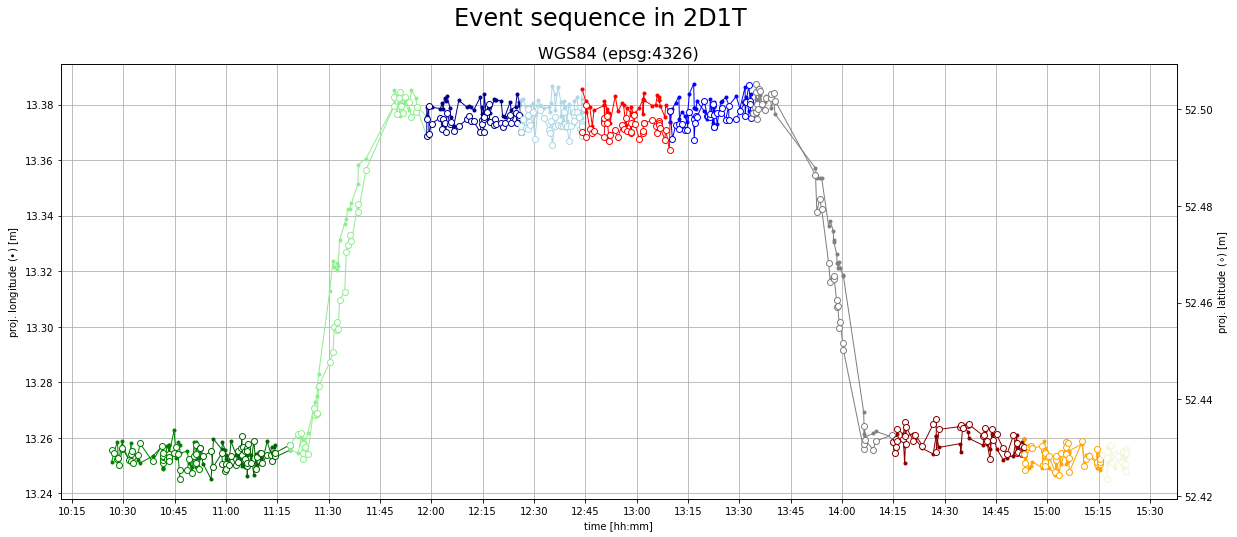

In [96]:
locator = mdates.AutoDateLocator(minticks=15, maxticks=30)


fig, ax = plt.subplots(1,1, figsize=[20,8])

axt = ax.twinx()

offset=40
range_ =51
for n in range(range_):
    nn = n*offset
    nnn = (n+1)*offset+1
    coco = coords[nn:nnn]

    ax.plot(times[nn:nnn], lons[nn:nnn], '.-', color=colors[n%len_colors], lw=1)
    axt.plot(times[nn:nnn], lats[nn:nnn], 'o-', markerfacecolor='w',markeredgewidth=1, color=colors[n%len_colors], lw=1)    

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator)    
ax.set_xticklabels([],visible=False)

axt.set_ylabel(r"latitude ($\circ$)")
ax.set_ylabel(r"longitude ($\bullet$)")
#ax.set_xlabel("time")
ax.set_title("WGS84 (epsg:4326)", fontsize=16)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_minor_locator(locator)    

axt.set_ylabel(r"proj. latitude ($\circ$) [m]")
ax.set_ylabel(r"proj. longitude ($\bullet$) [m]")
ax.set_xlabel("time [hh:mm]")
ax.grid();
fig.suptitle('Event sequence in 2D1T', fontsize=24);


## Shift & Scale transforms

In [31]:
from matplotlib import ticker

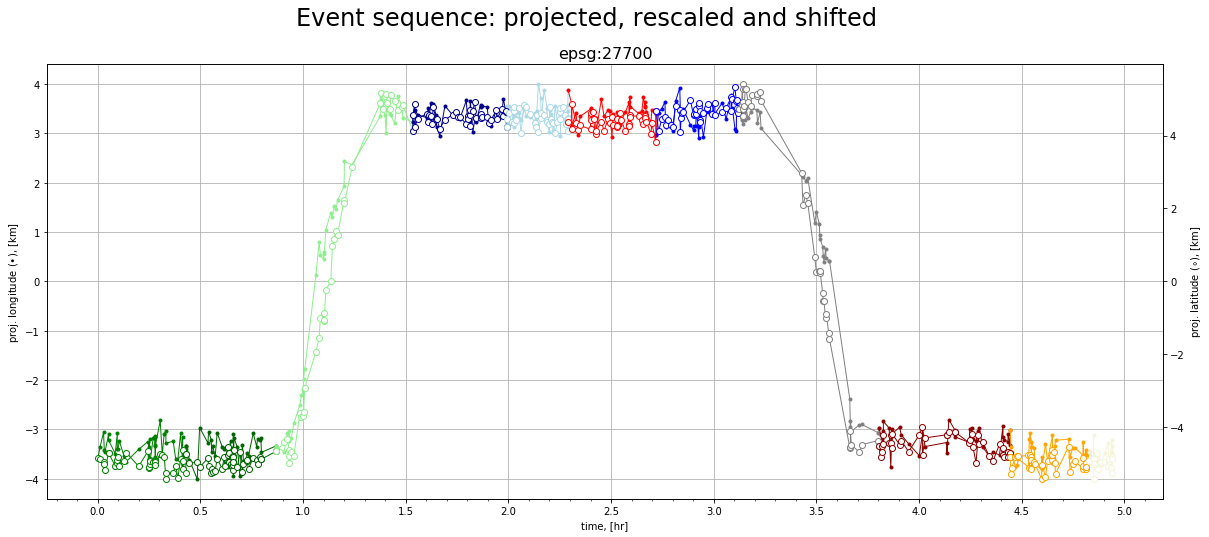

In [95]:
fig, ax = plt.subplots(1,1, figsize=[20,8])

axt = ax.twinx()

nplons = (plons-(plons.max()+plons.min())/2)/1000. #np.median(plon)
nplats = (plats-(plats.max()+plats.min())/2)/1000. #np.median(plat)
stamps = df.timestamp.values
stamps = (stamps-stamps.min())/3600.

for n in range(range_):
    nn = n*offset
    nnn = (n+1)*offset+1
    coco = coords[nn:nnn]
    color=colors[n%len_colors]
    ax.plot(stamps[nn:nnn], nplons[nn:nnn], '.-', color=color, lw=1)
    axt.plot(stamps[nn:nnn], nplats[nn:nnn], 'o-', markerfacecolor='w',markeredgewidth=1, color=color, lw=1)    

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))  

axt.set_ylabel(r"proj. latitude ($\circ$), [km]")
ax.set_ylabel(r"proj. longitude ($\bullet$), [km]")
ax.set_xlabel("time, [hr]")
ax.set_title("epsg:27700", fontsize=16)
ax.grid();
fig.suptitle('Event sequence: projected, rescaled and shifted', fontsize=24);

In [33]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

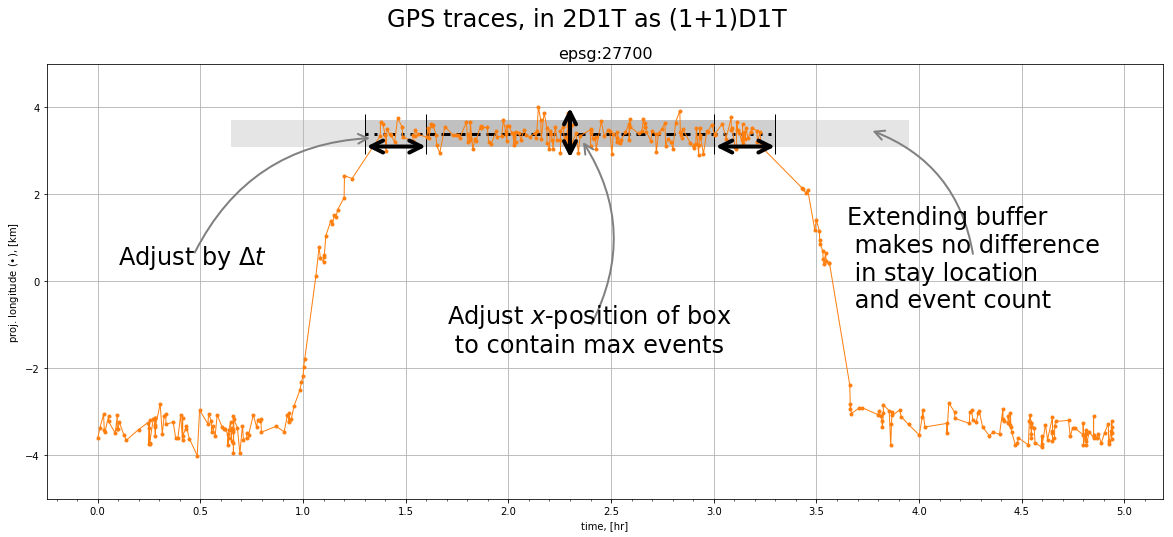

In [108]:
fig, ax = plt.subplots(1,1, figsize=[20,8])

eps = 0.3
begin = 1.6
begin_buff = begin-0.3
end = 3.0
end_buff = end+0.3

loc = 3.4

ax.plot([begin,end], [loc,loc], 'k--', dashes=[3,2], linewidth=3.0)
ax.plot([begin_buff,begin], [loc,loc], color='k', marker='|', markersize=40.0, dashes=[1,2], linewidth=3.0)
ax.plot([end,end_buff], [loc,loc], color='k', marker='|', markersize=40.0, dashes=[1,2], linewidth=3.0)

ax.plot(stamps, nplons, '.-', color='C1', lw=1, label='raw')

    
# Boxes
rect_small = Rectangle((begin, loc-eps), end-begin, 2*eps)
rect_middle = Rectangle((begin_buff, loc-eps), end_buff-begin_buff, 2*eps)
rect_big = Rectangle((begin_buff/2, loc-eps), end+(begin-begin_buff), 2*eps)
box_dict = dict(facecolor='gray', alpha=0.2, edgecolor='k',linewidth=0)
ax.add_collection(PatchCollection([rect_big], **box_dict))
ax.add_collection(PatchCollection([rect_middle], **box_dict))
ax.add_collection(PatchCollection([rect_small], **box_dict))


# Double arrows
arrowprops=dict(arrowstyle="<->", 
                shrinkA=0.5,
                mutation_scale=30.0,
                connectionstyle="arc3", linewidth=4.0)
arrowcentery = loc
arrowcenterx = 2.3
arrowcenterh = 2*eps
ax.annotate("", xy=(arrowcenterx, arrowcentery-arrowcenterh), xytext=(arrowcenterx, arrowcentery+arrowcenterh),
             arrowprops=arrowprops)

dt_arrowcentery = eps
ax.annotate("", xy=(begin_buff, arrowcentery-dt_arrowcentery), xytext=(begin, arrowcentery-dt_arrowcentery),
             arrowprops=arrowprops)

ax.annotate("", xy=(end, arrowcentery-dt_arrowcentery), xytext=(end_buff, arrowcentery-dt_arrowcentery),
             arrowprops=arrowprops)

# Annotations
arrowprops=dict(arrowstyle="->", color="0.5",
                shrinkA=5, shrinkB=5,
                patchA=None, patchB=None,
                connectionstyle="arc3,rad=-0.3", linewidth=2.0)

delta_t_texty = 0.4

mid_point = lambda x1,x2: 0.5*(x1+x2)


anno_dict = dict(fontsize= 24,textcoords='data', xycoords='data')
ax.annotate(r"Adjust by $\Delta t$",
            xy=(mid_point(begin,begin_buff)-0.1, 3.3),
            xytext=(begin-1.5,delta_t_texty),
            **anno_dict, arrowprops=arrowprops)

arrowprops['connectionstyle']="arc3,rad=0.3"


ax.annotate("Extending buffer\n makes no difference\n in stay location\n and event count",
            xy=(mid_point(end,end_buff)+0.6, 3.5),
            xytext=(end+0.65, delta_t_texty-1.0),
            **anno_dict, arrowprops=arrowprops)

ax.annotate(s=r"Adjust $x$-position "+"of box\n to contain max events",
            xy=(arrowcenterx+0.05, arrowcentery-0.1),
            xytext=(arrowcenterx-0.6, arrowcentery-5.0),
            **anno_dict, arrowprops=arrowprops)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))  

axt.set_ylabel(r"proj. latitude ($\circ$), [km]")
ax.set_ylabel(r"proj. longitude ($\bullet$), [km]")
ax.set_xlabel("time, [hr]")
ax.set_title("epsg:27700", fontsize=16)
ax.grid(visible=True)
ax.set_ylim(-5,5)
fig.suptitle('GPS traces, in 2D1T as (1+1)D1T', fontsize=24);

In [103]:
fig.savefig('output_190_0', layout='tight')

In [105]:
!rm ../../docs/illustration/output_190_0.png
!cp output_190_0.png ../../docs/illustration/output_190_0.png